In [1]:
import json

with open("./tests/benchmark_results.json", "r") as f:
    data = json.load(f)

Top slowest benchmarks:
                   name  unit           min       max          mean  \
0  test_depi_resolution  None  2.999986e-07  0.000280  4.147170e-07   
2      test_depi_memory  None  2.999986e-07  0.000001  3.699000e-07   
3        test_di_memory  None  0.000000e+00  0.000023  1.260000e-07   
1    test_di_resolution  None  0.000000e+00  0.000170  1.016726e-07   

         stddev  samples group                                        fullname  
0  1.000063e-06        0  None  tests/test_benchmarks.py::test_depi_resolution  
2  6.186937e-08        0  None      tests/test_benchmarks.py::test_depi_memory  
3  7.840655e-07        0  None        tests/test_benchmarks.py::test_di_memory  
1  3.777677e-07        0  None    tests/test_benchmarks.py::test_di_resolution  

Top fastest benchmarks:
                   name  unit           min       max          mean  \
1    test_di_resolution  None  0.000000e+00  0.000170  1.016726e-07   
3        test_di_memory  None  0.000000e+00  0.0

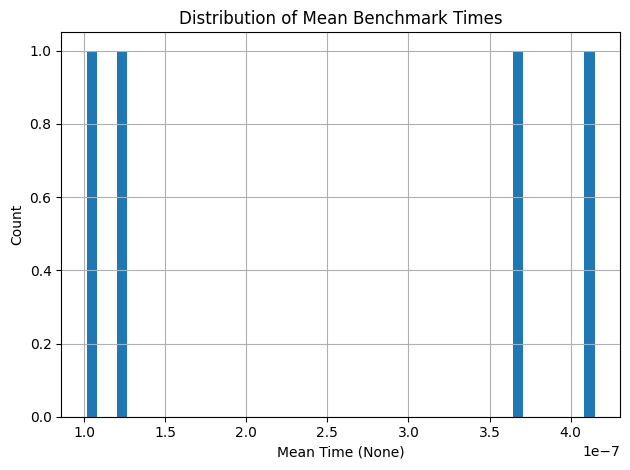

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt

benchmarks = data["benchmarks"]

# Normalize the benchmark list
rows = []
for b in benchmarks:
    row = {
        "name": b.get("name"),
        "unit": b.get("unit"),
        "min": b.get("stats", {}).get("min"),
        "max": b.get("stats", {}).get("max"),
        "mean": b.get("stats", {}).get("mean"),
        "stddev": b.get("stats", {}).get("stddev"),
        "samples": len(b.get("samples", [])),
        "group": b.get("group", None),
        "fullname": b.get("fullname", b.get("name")),
    }
    rows.append(row)

df = pd.DataFrame(rows)

# Summary stats
print("Top slowest benchmarks:")
print(df.sort_values("mean", ascending=False).head(10))

print("\nTop fastest benchmarks:")
print(df.sort_values("mean", ascending=True).head(10))

# Histogram
df["mean"].hist(bins=50)
plt.title("Distribution of Mean Benchmark Times")
plt.xlabel("Mean Time ({})".format(df['unit'].iloc[0] if 'unit' in df else 'unknown'))
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save to CSV if needed
df.to_csv("benchmark_summary.csv", index=False)

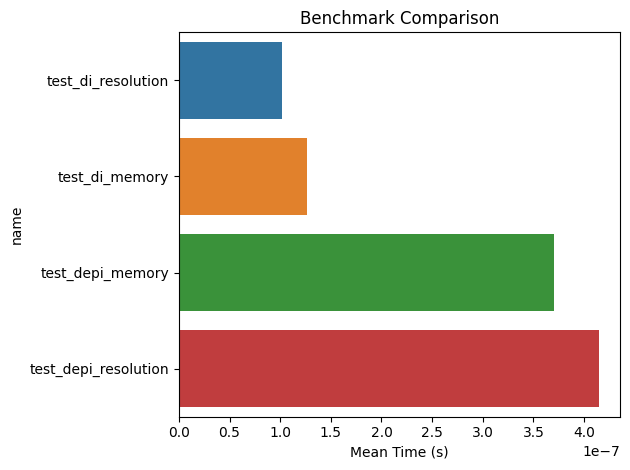

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df_sorted = df.sort_values("mean")
sns.barplot(data=df_sorted, x="mean", y="name")
plt.xlabel("Mean Time (s)")
plt.title("Benchmark Comparison")
plt.tight_layout()
plt.show()